<a href="https://colab.research.google.com/github/AthiraBinod-19/Dataworks-Automation-Agent/blob/main/BA_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [2]:
!pip install requests


In [6]:
import requests

# Google Drive file ID from the provided URL
file_id = '18_x30cHk77okd1ssPMx7qG-o3oDVE-E8'

# Construct the direct download URL
url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Send the request to download the file
response = requests.get(url)

# Save the content to a file in Colab
file_path = '/content/GOF.xlsx'
with open(file_path, 'wb') as f:
    f.write(response.content)

print("File downloaded successfully!")


File downloaded successfully!


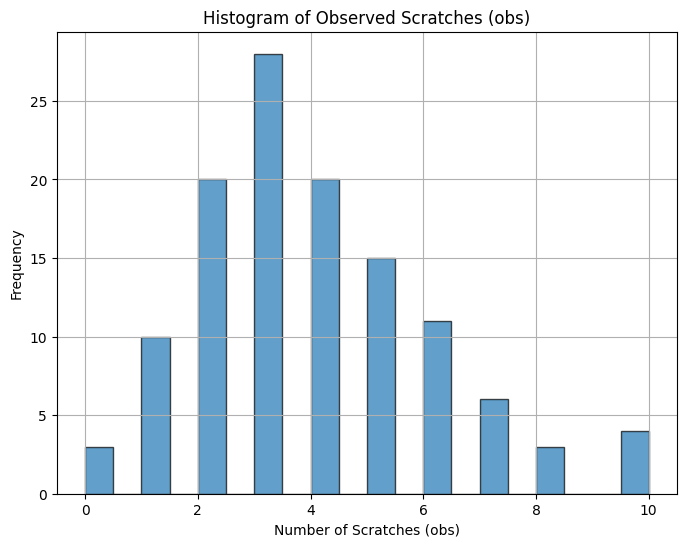

Summary Statistics:
count    120.000000
mean       3.841667
std        2.145920
min        0.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       10.000000
Name: obs, dtype: float64

Is the data discrete? Yes

Conclusion: The data follows a discrete distribution.


In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the GOF.xlsx file
data = pd.read_excel('/content/GOF.xlsx')

# Check if the data contains integer values (discrete) or floats (continuous)
is_integer = all(data['obs'].apply(lambda x: float(x).is_integer()))

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(data['obs'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Histogram of Observed Scratches (obs)')
plt.xlabel('Number of Scratches (obs)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Display summary statistics
summary_stats = data['obs'].describe()

# Output the conclusions based on the data type
print(f"Summary Statistics:\n{summary_stats}")
print(f"\nIs the data discrete? {'Yes' if is_integer else 'No'}")

if is_integer:
    print("\nConclusion: The data follows a discrete distribution.")
else:
    print("\nConclusion: The data follows a continuous distribution.")


In [7]:
import pandas as pd

# Load the downloaded Excel file into a pandas DataFrame
data = pd.read_excel('/content/GOF.xlsx', engine='openpyxl')

# Check the first few rows of the data
data.head()


,obs
0,4
1,3
2,8
3,7
4,4


In [8]:
expected_scratches = data['obs'].mean()

# Display the expected number of scratches
print(f"The expected number of scratches on a car is: {expected_scratches}")

The expected number of scratches on a car is: 3.841666666666667


Mean: 3.841666666666667
Median: 3.0
Mode: 3


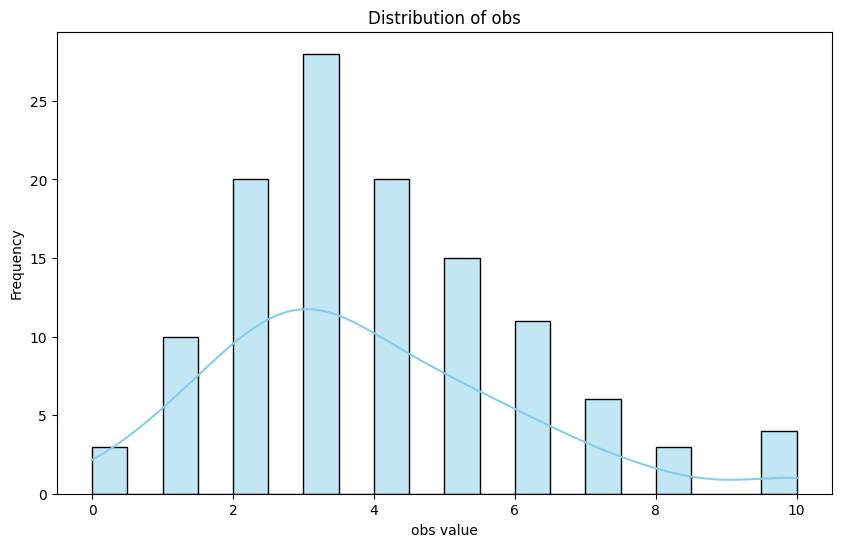

Inferred distribution type: None of the above


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the Excel file
file_path = '/content/GOF.xlsx'
data = pd.read_excel(file_path, engine='openpyxl')

# Assuming the column is named 'obs'
column_name = 'obs'  # Adjust if needed

# Calculate descriptive statistics
mean_value = data[column_name].mean()
median_value = data[column_name].median()
mode_value = data[column_name].mode()[0]

# Print the descriptive statistics
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")

# Visualize the distribution using a histogram and kernel density estimate (KDE)
plt.figure(figsize=(10, 6))
sns.histplot(data[column_name], kde=True, bins=20, color='skyblue')

# Display the plot
plt.title(f'Distribution of {column_name}')
plt.xlabel(f'{column_name} value')
plt.ylabel('Frequency')
plt.show()

# Determine the type of distribution based on the relationship between mean, median, and mode
if mean_value > median_value > mode_value:
    distribution = "Right skewed distribution as the mean > median > mode"
elif mode_value > median_value > mean_value:
    distribution = "Left skewed distribution as the mode > median > mean"
elif mean_value == median_value == mode_value:
    distribution = "Symmetric distribution"
else:
    distribution = "None of the above"

# Print the inferred distribution type
print("Inferred distribution type:", distribution)


Chi-Square Statistic: 27.621902375802875
P-value: 0.002074619027094274
Probability of observing exactly 3 defects: 0.2027650751720814


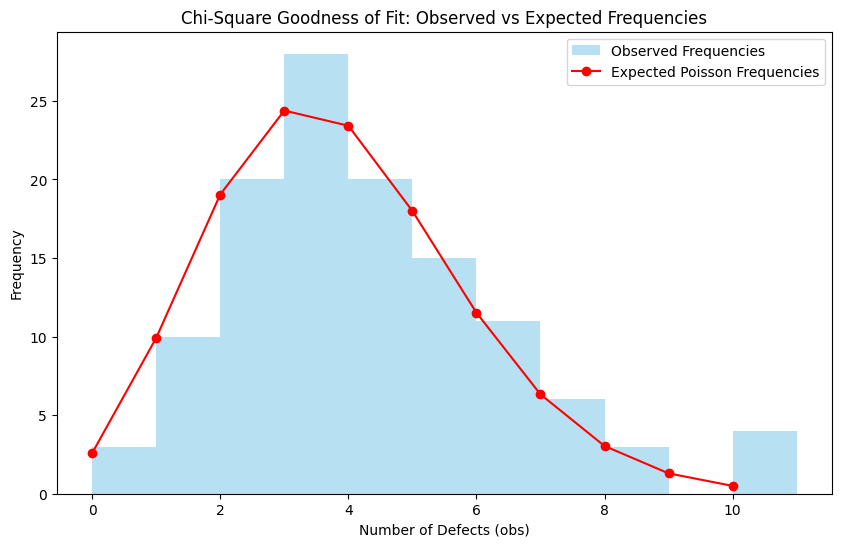

In [11]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Load the data from the Excel file
file_path = '/content/GOF.xlsx'
data = pd.read_excel(file_path, engine='openpyxl')

# Assuming the column is named 'obs'
column_name = 'obs'  # Adjust if needed

# Calculate descriptive statistics
mean_value = data[column_name].mean()

# Step 1: Create bins for the Chi-Square test
# We'll use bins from 0 to the max value in 'obs' for the test
bins = np.arange(0, data[column_name].max() + 2)  # Adding 2 to include the max value

# Step 2: Calculate observed frequencies (O)
observed_freq, bin_edges = np.histogram(data[column_name], bins=bins)

# Step 3: Calculate expected frequencies (E) assuming a Poisson distribution
expected_freq = []
for i in range(len(bins) - 1):
    # Poisson PMF: P(X = k) = (lambda^k * exp(-lambda)) / k!
    expected_freq.append(stats.poisson.pmf(i, mean_value) * len(data))

# Step 4: Scale the expected frequencies to ensure the total sum matches observed frequencies
expected_sum = sum(expected_freq)
observed_sum = sum(observed_freq)

# Scale the expected frequencies to match the observed sum
scaled_expected_freq = [e * (observed_sum / expected_sum) for e in expected_freq]

# Step 5: Perform Chi-Square Test (Observed vs Expected)
chi2_stat, p_value = stats.chisquare(observed_freq, scaled_expected_freq)

# Print the Chi-Square statistic and p-value
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Step 6: Calculate the probability of observing exactly 3 defects
# For Poisson distribution, use the PMF
prob_3_defects = stats.poisson.pmf(3, mean_value)
print(f"Probability of observing exactly 3 defects: {prob_3_defects}")

# Plot the histogram and expected Poisson distribution
plt.figure(figsize=(10, 6))
plt.hist(data[column_name], bins=bins, alpha=0.6, color='skyblue', label='Observed Frequencies')
plt.plot(bins[:-1], scaled_expected_freq, 'ro-', label='Expected Poisson Frequencies')
plt.title('Chi-Square Goodness of Fit: Observed vs Expected Frequencies')
plt.xlabel('Number of Defects (obs)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [13]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Load the data from the Excel file
file_path = '/content/GOF.xlsx'
data = pd.read_excel(file_path, engine='openpyxl')

# Assuming the column is named 'obs'
column_name = 'obs'  # Adjust if needed

# Calculate descriptive statistics (mean) for the "obs" column
mean_value = data[column_name].mean()

# Step 1: Create bins for the Chi-Square test
# We'll use bins from 0 to the max value in 'obs' for the test
bins = np.arange(0, data[column_name].max() + 2)  # Adding 2 to include the max value

# Step 2: Calculate observed frequencies (O)
observed_freq, bin_edges = np.histogram(data[column_name], bins=bins)

# Step 3: Calculate expected frequencies (E) assuming a Poisson distribution
expected_freq = []
for i in range(len(bins) - 1):
    # Poisson PMF: P(X = k) = (lambda^k * exp(-lambda)) / k!
    expected_freq.append(stats.poisson.pmf(i, mean_value) * len(data))

# Step 4: Scale the expected frequencies to ensure the total sum matches observed frequencies
expected_sum = sum(expected_freq)
observed_sum = sum(observed_freq)

# Scale the expected frequencies to match the observed sum
scaled_expected_freq = [e * (observed_sum / expected_sum) for e in expected_freq]

# Step 5: Perform Chi-Square Test (Observed vs Expected)
chi2_stat, p_value = stats.chisquare(observed_freq, scaled_expected_freq)

# Print the Chi-Square statistic and p-value
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Calculate the degrees of freedom
# df = number of bins - 1 - number of parameters estimated (mean for Poisson = 1)
df = len(bins) - 1 - 1
print(f"Degrees of Freedom (df): {df}")


Chi-Square Statistic: 27.621902375802875
P-value: 0.002074619027094274
Degrees of Freedom (df): 10


In [14]:
import pandas as pd
import numpy as np

# Load the data from the Excel file
file_path = '/content/GOF.xlsx'  # Replace with the correct path if needed
data = pd.read_excel(file_path, engine='openpyxl')

# Assuming the column is named 'obs'
column_name = 'obs'  # Adjust if needed

# Step 1: Create bins for the Chi-Square test
# We'll use bins from 0 to the max value in 'obs' for the test
bins = np.arange(0, data[column_name].max() + 2)  # Adding 2 to include the max value

# Step 2: Number of bins (k)
k = len(bins) - 1  # Number of bins

# Step 3: Number of parameters estimated (p)
# For Poisson distribution, we estimate the mean, so p = 1
p = 1

# Step 4: Calculate degrees of freedom (df)
df = k - 1 - p

# Print the degrees of freedom
print(f"Degrees of Freedom (df): {df}")


Degrees of Freedom (df): 9


In [15]:
import pandas as pd
import requests

# URL of the file on Google Drive (direct download link)
file_url = 'https://drive.google.com/uc?id=1H1Twoqnwd5mWcs1jFynyS9WadaXK3io1'

# Download the file
r = requests.get(file_url)
with open('/content/iitm_onlineDegree.csv', 'wb') as f:
    f.write(r.content)

# Load the data from the downloaded CSV file
data = pd.read_csv('/content/iitm_onlineDegree.csv')

# Show the first few rows of the data to verify it's loaded correctly
data.head()


,Gender,Preference
0,Female,Business
1,Female,Programming
2,Male,Business
3,Female,Statistics
4,Female,Programming


In [19]:
import pandas as pd
import scipy.stats as stats

# Load the data from the CSV file
data = pd.read_csv('/content/iitm_onlineDegree.csv')

# Clean the column names by stripping any leading/trailing spaces
data.columns = data.columns.str.strip()

# Create a contingency table using the 'Gender' and 'Preference' columns
contingency_table = pd.crosstab(data['Gender'], data['Preference'])

# Perform the Chi-Square test for independence
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the degrees of freedom
print(f"Degrees of Freedom (df): {dof}")


Degrees of Freedom (df): 2


In [20]:
import pandas as pd
import scipy.stats as stats

# Load the data from the CSV file
data = pd.read_csv('/content/iitm_onlineDegree.csv')

# Clean the column names by stripping any leading/trailing spaces
data.columns = data.columns.str.strip()

# Create a contingency table using the 'Gender' and 'Preference' columns
contingency_table = pd.crosstab(data['Gender'], data['Preference'])

# Perform the Chi-Square test for independence
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the contingency table and expected values
print("Contingency Table:\n", contingency_table)
print("\nExpected Values:\n", expected)

# Find the expected value for Female in Business subjects
# Find the index of 'Female' and 'Business' in the contingency table
# The expected value is at the position (Female, Business) in the expected array
female_index = list(contingency_table.index).index('Female')
business_index = list(contingency_table.columns).index('Business')

# Extract the expected value for Female in Business subjects
expected_value_female_business = expected[female_index, business_index]

print(f"\nExpected value for Female in Business subjects: {expected_value_female_business}")


Contingency Table:
 Preference  Business  Programming  Statistics
Gender                                       
Female           175           58         200
Male             139           36         124

Expected Values:
 [[185.74043716  55.60382514 191.6557377 ]
 [128.25956284  38.39617486 132.3442623 ]]

Expected value for Female in Business subjects: 185.74043715846994


In [21]:
import pandas as pd
import scipy.stats as stats

# Load the data from the CSV file
data = pd.read_csv('/content/iitm_onlineDegree.csv')

# Clean the column names by stripping any leading/trailing spaces
data.columns = data.columns.str.strip()

# Create a contingency table using the 'Gender' and 'Preference' columns
contingency_table = pd.crosstab(data['Gender'], data['Preference'])

# Perform the Chi-Square test for independence
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the calculated Chi-Square statistic rounded to two decimals
print(f"Chi-Square Statistic: {round(chi2_stat, 2)}")


Chi-Square Statistic: 2.66


In [22]:
import pandas as pd
import scipy.stats as stats

# Load the data from the CSV file
data = pd.read_csv('/content/iitm_onlineDegree.csv')

# Clean the column names by stripping any leading/trailing spaces
data.columns = data.columns.str.strip()

# Create a contingency table using the 'Gender' and 'Preference' columns
contingency_table = pd.crosstab(data['Gender'], data['Preference'])

# Perform the Chi-Square test for independence
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Set the significance level (α), typically 0.05 for 95% confidence
alpha = 0.05

# Calculate the tabulated (critical) value for Chi-Square at the given significance level
tabulated_value = stats.chi2.ppf(1 - alpha, dof)

# Print the tabulated value rounded to two decimals
print(f"Tabulated Chi-Square Statistic: {round(tabulated_value, 2)}")


Tabulated Chi-Square Statistic: 5.99


In [24]:
import pandas as pd
import scipy.stats as stats

# Load the data from the CSV file
data = pd.read_csv('/content/iitm_onlineDegree.csv')

# Clean the column names by stripping any leading/trailing spaces
data.columns = data.columns.str.strip()

# Create a contingency table using the 'Gender' and 'Preference' columns
contingency_table = pd.crosstab(data['Gender'], data['Preference'])

# Perform the Chi-Square test for independence
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the p-value rounded to two decimals
print(f"P-value: {round(p_value, 4)}")


P-value: 0.2641


In [25]:
import pandas as pd
import scipy.stats as stats

# Load the data from the CSV file
data = pd.read_csv('/content/iitm_onlineDegree.csv')

# Clean the column names by stripping any leading/trailing spaces
data.columns = data.columns.str.strip()

# Create a contingency table using the 'Gender' and 'Preference' columns
contingency_table = pd.crosstab(data['Gender'], data['Preference'])

# Perform the Chi-Square test for independence
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Set significance level
alpha = 0.05

# Determine the conclusion based on the p-value
if p_value < alpha:
    conclusion = "Reject the null hypothesis and conclude that the categorical variables are not independent"
else:
    conclusion = "Fail to reject the null hypothesis and conclude that the categorical variables are independent"

# Print the conclusion
print(f"Conclusion: {conclusion}")


Conclusion: Fail to reject the null hypothesis and conclude that the categorical variables are independent
